# Credit Card Fraud Detection Capston Project

## Problem Statement : Prediction fraudulent credit card transactions with the help of machine learning models.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Project pipeline
1. Data Understanding : :load and understand the features in it
2. Exploratory Data Analysis (EDA) : 
 a.Power transformation to remove skewness
 b.Application of Oversampling and undersamling technique to for imbalance treatment etc.
3. Application of ML algorithms : Logistic regression, Decesion trees, Random Forest, XGBoost
4.Hyper parameter tunung using GridSearchCV & RandomizwdsearchCV
5.KFold Cross Validation
6.Metric used for model evaluaion : ROC-AUC

Note : Project is devided into two phase: 
       phase1 - Modeling with imbalaced data
       Phase2 - Modeling post balancing data with Random over sampling SMOTE     &   Adasyn

In [ ]:
# Importing required libraries :
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import time
import seaborn as sns

import warnings # supress warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capston Project_Credit Card Fraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Lets check the numeric distribution
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We can see that there is no outliers in dataset

In [ ]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All variables datatype looking as expected.

In [ ]:
# Checking correlation in the data

cormat = df.corr()
cormat


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [ ]:
cormat.to_excel("/content/drive/MyDrive/Colab Notebooks/Capston Project_Credit Card Fraud/output.xlsx") 

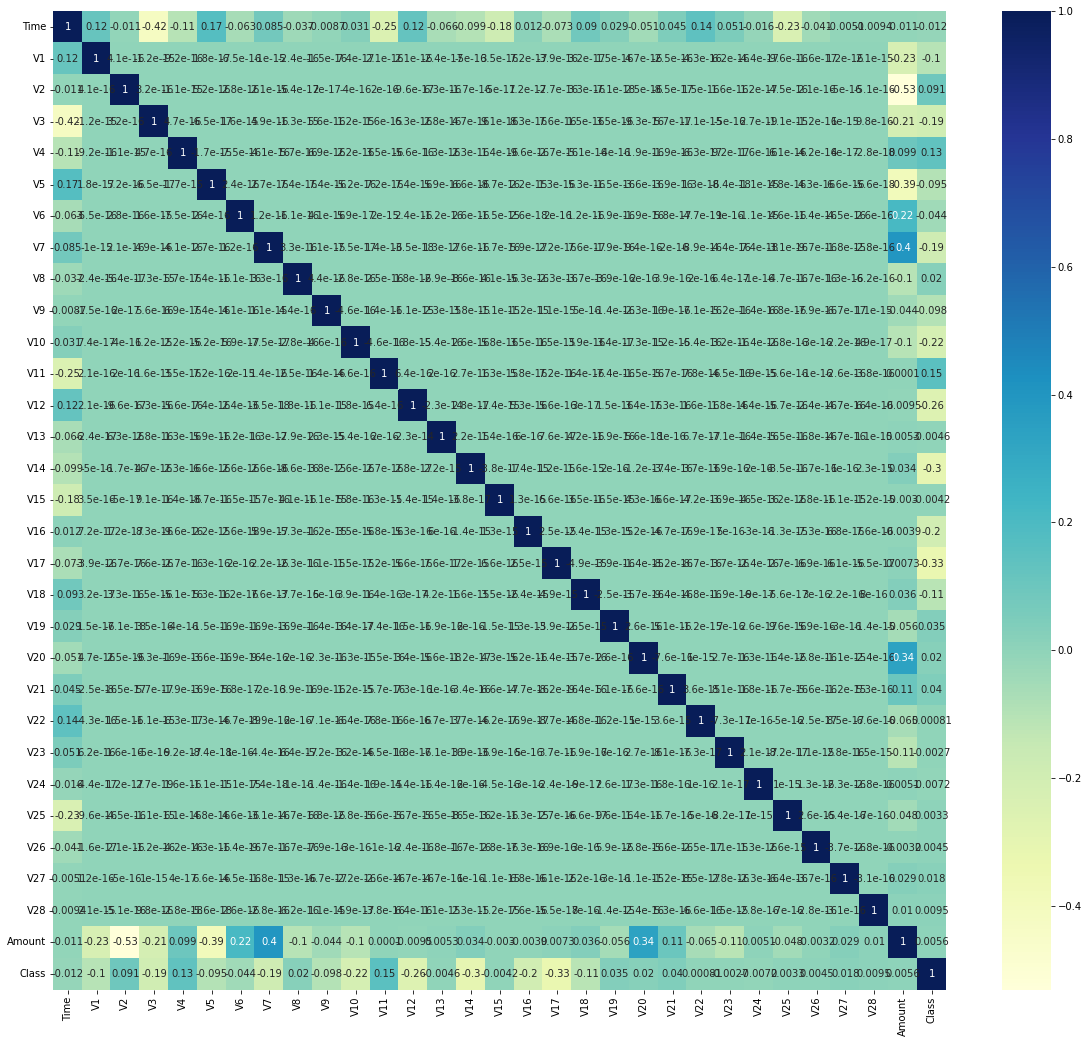

In [ ]:
# heatmap plotting
plt.figure(figsize=(20,18))
sns.heatmap(cormat, cmap="YlGnBu", annot=True)
plt.show()

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [ ]:
#Check the fraud/Non_Fraud records
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#checking if any null values
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values in the dataset

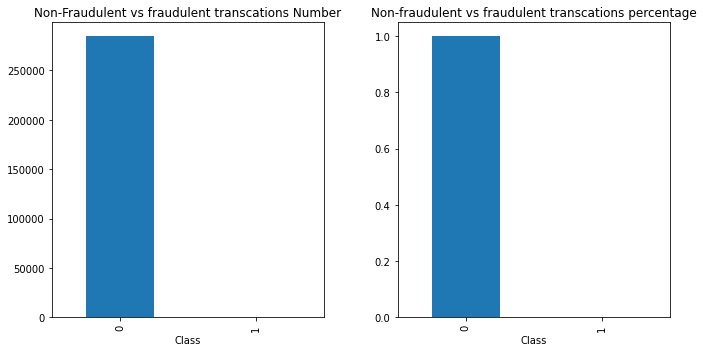

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
classes.plot.bar()
plt.title('Non-Fraudulent vs fraudulent transcations Number')
plt.xlabel('Class')
plt.subplot(1,2,2)
df['Class'].value_counts(normalize = True).plot.bar()
plt.title('Non-fraudulent vs fraudulent transcations percentage')
plt.xlabel('Class')
plt.tight_layout()
plt.show()


We can see here that fraudulent transcations ( Class 1) are very less as compared to Non - fraudulent transcations ( Class 0).

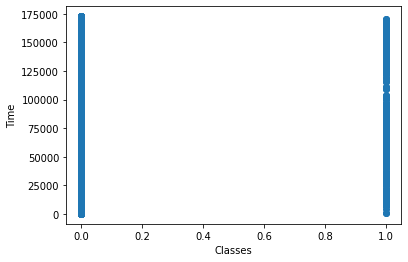

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df.Class,df.Time)
plt.xlabel('Classes')
plt.ylabel('Time')
plt.show()

Above plot shows that there is not any dependency of time with respect to Non-Fraudulent and fraudulent transcations.

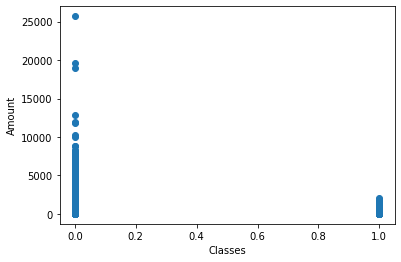

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df.Class,df.Amount)
plt.xlabel('Classes')
plt.ylabel('Amount')
plt.show()

Above plot shows that maximum ammount belongs to Non-Fraudulent transactons which is noraml.However,there is also considerable amount comapany is loosing due to Non-Fraudulent transcations.

In [ ]:
# Drop unnecessary columns
df = df.drop('Time',axis = 1) # 'Time' column dropped as it is serial no kind of thing and does not required in modelling

In [ ]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values

### Splitting the data into train & test data

In [ ]:
#y= #class variable

y = df['Class']
X = df.drop('Class',axis =1)

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
X_test_copy = X_test
y_test_copy = y_test

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


In [ ]:
#Checking skewness in data over the index axis
skew = df.skew(axis = 0, skipna = True)
skew_df = pd.DataFrame(skew)
skew_df = skew_df.reset_index()
skew_df.columns = ['Feature','Skew']
skew_df

,Feature,Skew
0,Time,-0.035568
1,V1,-3.280667
2,V2,-4.624866
3,V3,-2.240155
4,V4,0.676292
5,V5,-2.425901
6,V6,1.826581
7,V7,2.553907
8,V8,-8.521944
9,V9,0.554680


In [ ]:
skew_df_Not_acceptable = skew_df[(skew_df.Skew>3) | (skew_df.Skew< -3)] # df of highly skewed data

In [ ]:
skew_df_Not_acceptable

,Feature,Skew
0,V1,-3.280667
1,V2,-4.624866
7,V8,-8.521944
16,V17,-3.844914
20,V21,3.592991
22,V23,-5.875140
27,V28,11.192091
28,Amount,16.977724
29,Class,23.997579


we can see that only V21 & V28 are right skewed ( Postive skew value) while others are left skewed( Negative skew value)

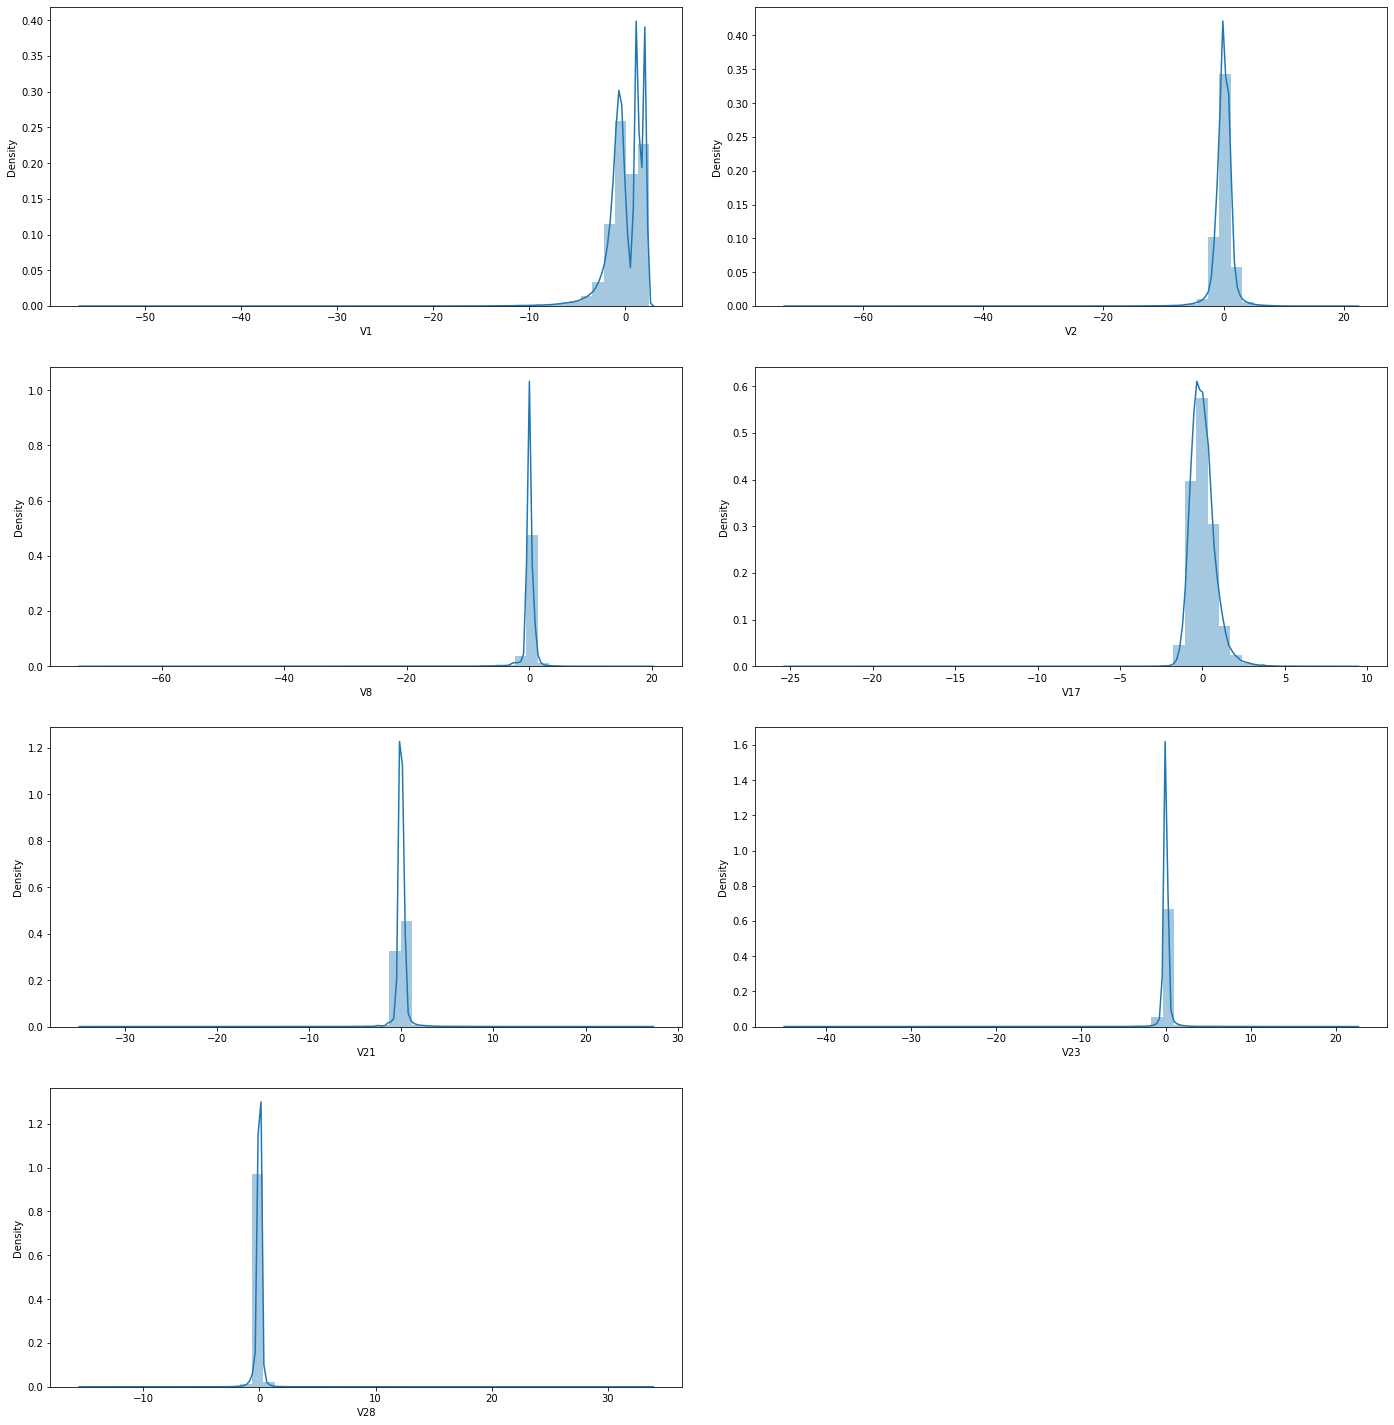

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
# plotting distplot to view left/right skewness in skewed columns
plt.figure(figsize=(20,20))
plt.tight_layout(pad=3.0)

plt.subplot(4,2,1)

sns.distplot(df['V1'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,2)

sns.distplot(df['V2'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,3)

sns.distplot(df['V8'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,4)

sns.distplot(df['V17'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,5)

sns.distplot(df['V21'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,6)

sns.distplot(df['V23'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,7)

sns.distplot(df['V28'],kde = True)


### We will use power transformation to make distribution more gaussian.

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt  = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_pt = pt.fit_transform(X_train)

In [ ]:
X_train_pt = pd.DataFrame(X_train_pt,columns = X_train.columns)

In [ ]:
X_train_pt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.977762,0.598470,-0.076635,0.414364,0.017924,-0.150960,0.345395,-0.423005,0.053042,1.152344,...,-0.142787,-0.217742,-0.215110,0.229615,-0.518220,-0.140181,1.711153,-0.180481,-0.027825,-1.853467
1,0.730062,1.445565,-0.134373,-0.902690,0.208193,0.136115,-0.409005,0.073299,-0.252318,0.277355,...,-0.220963,-0.355324,-0.881595,0.418801,-0.841362,-0.510193,0.511993,-0.206056,-0.220886,-1.446662
2,-0.254749,0.843049,-0.987411,-0.652970,-1.919788,0.423178,2.278265,-1.478071,0.853644,-1.629738,...,-0.090662,-0.009865,0.104342,-0.203779,1.917859,0.990486,0.014536,0.099397,0.107899,0.706491
3,1.193842,-0.326321,0.805913,-0.366669,-0.296532,0.512231,-0.805682,0.794658,-0.185940,0.130993,...,0.173877,-0.457294,-1.012077,0.252022,1.861162,-0.857357,0.288656,0.854371,0.473371,-1.576187
4,-0.980315,0.566536,-0.144094,0.637616,0.445581,-0.564414,0.053504,-0.482081,0.184401,0.269297,...,-0.222159,0.013937,-0.092414,0.225649,0.287704,-0.037162,0.529867,-0.020486,0.051746,-0.715547


In [ ]:
# plot the histogram of a variable from the dataset again to see the result 

In [ ]:
#Checking skewness in data over the index axis
skew = X_train_pt.skew(axis = 0, skipna = True)
skew_df = pd.DataFrame(skew)
skew_df = skew_df.reset_index()
skew_df.columns = ['Feature','Skew']
skew_df

,Feature,Skew
0,Time,-0.227865
1,V1,-0.217901
2,V2,0.327536
3,V3,-0.076278
4,V4,0.018000
5,V5,-0.259222
6,V6,-1.954194
7,V7,0.523162
8,V8,2.190573
9,V9,-0.041243


We can see that skew values are quite acceptable and data will be now normally distributed.

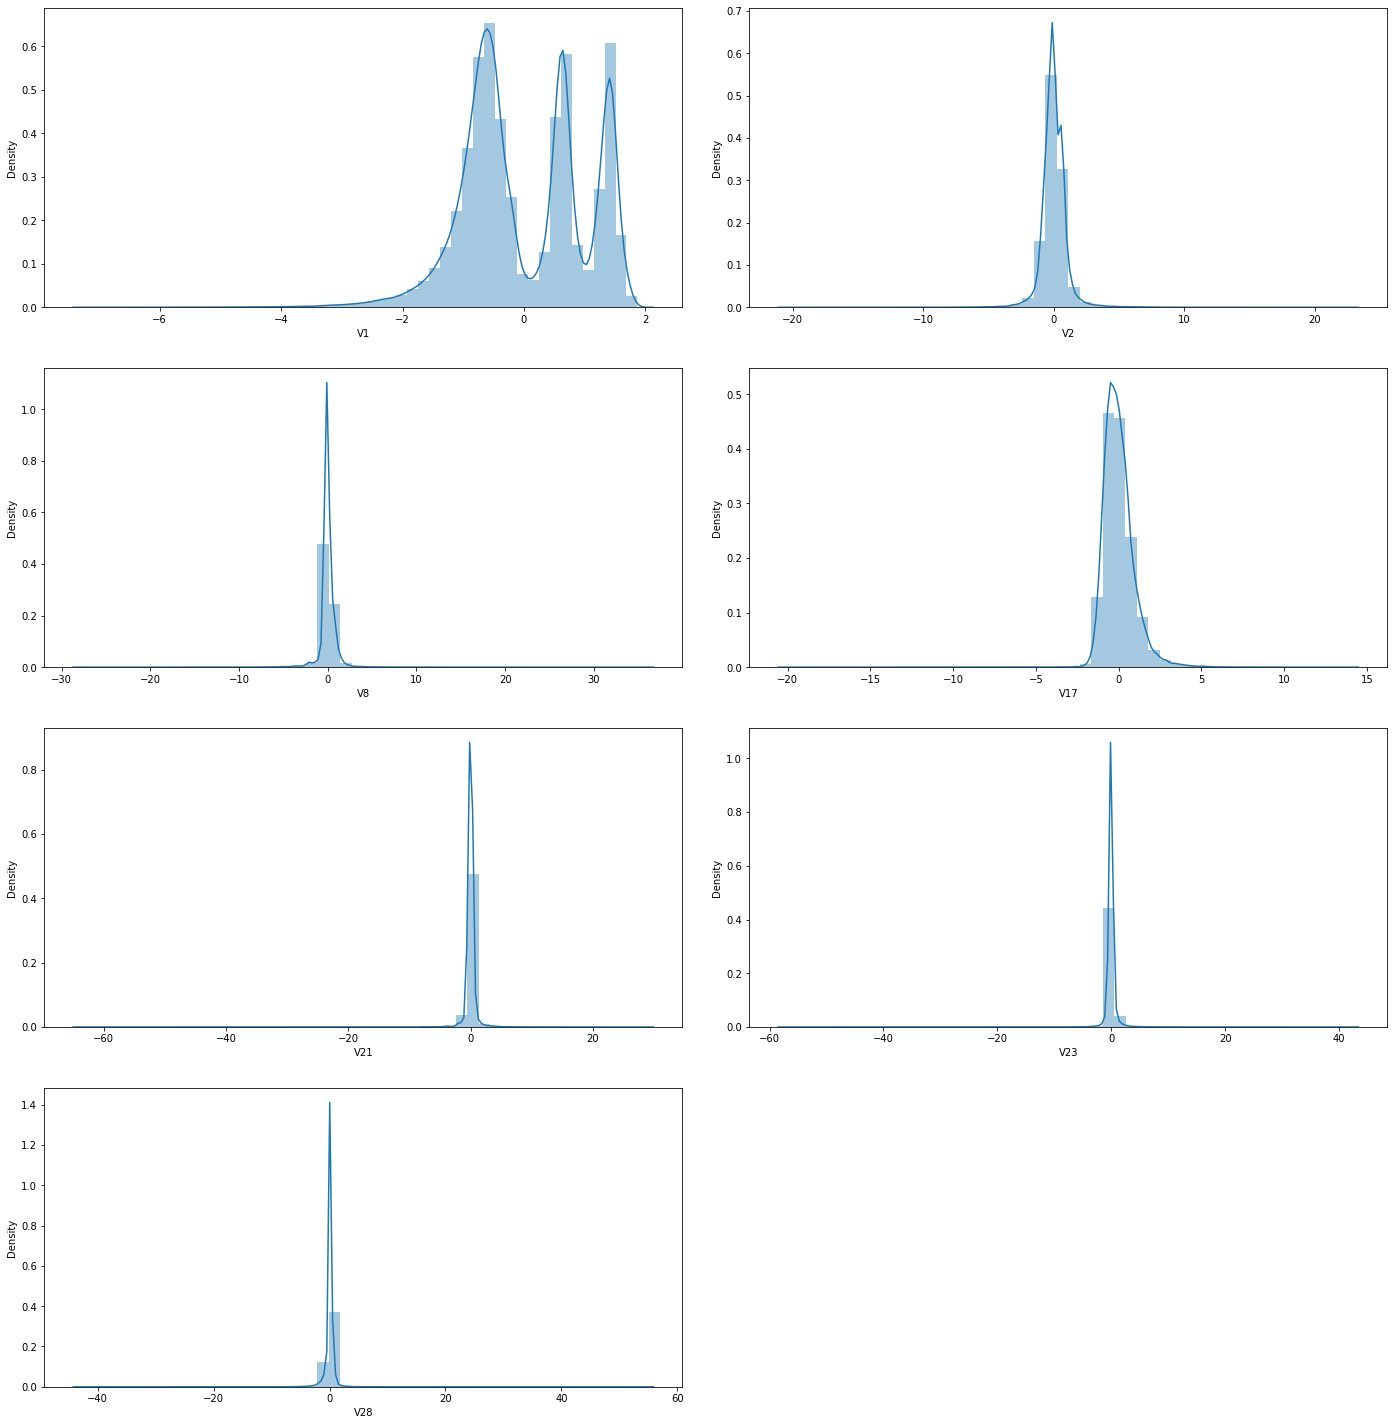

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
# plotting distplot to view left/right skewness in skewed columns
plt.figure(figsize=(20,20))
plt.tight_layout(pad=3.0)

plt.subplot(4,2,1)

sns.distplot(X_train_pt['V1'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,2)

sns.distplot(X_train_pt['V2'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,3)

sns.distplot(X_train_pt['V8'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,4)

sns.distplot(X_train_pt['V17'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,5)

sns.distplot(X_train_pt['V21'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,6)

sns.distplot(X_train_pt['V23'],kde = True)
plt.tight_layout(pad=3.0)

plt.subplot(4,2,7)

sns.distplot(X_train_pt['V28'],kde = True)


So.now data is normally distributed.

## Model Building
- Build different models on the imbalanced dataset and see the result

# Logistic Regression

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model1 = lr.fit(X_train_pt,y_train)
model1
y_test_pred = model1.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.8517668418926119

## Logistic Regression with cross valiadation

In [ ]:

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define Random_search
params = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator=model1, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model1, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)

grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.8284834950592134
0.80619148826913


#### Logistic regression roc_auc score (imbalanced data) : 82.48 % ( Training ) , 80.62% ( Test )

In [ ]:
# GridSearch results - Training
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.985993 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}
Best estimator LogisticRegression(C=0.01, solver='liblinear')


# KNN

In [ ]:
# KNN default model with arbitarary no of neighbor value say 3 ( odd value always taken)
knn = KNeighborsClassifier(n_neighbors=3)
model2 = knn.fit(X_train_pt,y_train)


In [ ]:
y_test_pred = model2.predict(X_test)

In [ ]:
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.8413851710867778

In [ ]:
# Lets find best parameter value with GridsearchCV

params = {'n_neighbors': [3,5,7,9,11]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator=model2, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model2, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)


In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.8399296531902278
0.8167431453588296


### KNN roc_auc score (imbalanced data) : 83.99 % ( Training ) , 81.67% ( Test )

In [ ]:
# GridSearch results - Training
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.937882 using {'n_neighbors': 11}
Best estimator KNeighborsClassifier(n_neighbors=11)


# Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,random_state=100)
model3 = dt.fit(X_train_pt, y_train)
y_test_pred = model3.predict(X_test)

In [ ]:
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.9080697004856538

In [ ]:
# Lets find best parameter value with GridsearchCV
criterion = ['gini','entropy']
max_depth = [3,4,5,10,15,20,30,40,50]
params = dict(criterion=criterion,max_depth=max_depth)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator=model3, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model3, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)

grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.9184106358633779
0.9081927940015564


### Decision Tree roc_auc score (imbalanced data) : 91.84 % ( Training ) , 90.81% ( Test )

In [ ]:
# GridSearch results - Training
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.938432 using {'max_depth': 5, 'criterion': 'entropy'}
Best estimator DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=100)


# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=10,max_depth=4,min_samples_leaf=10)

In [ ]:
model4 = rf.fit(X_train_pt,y_train)

In [ ]:
y_test_pred = model4.predict(X_test)

In [ ]:
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.8449121594433365

In [ ]:
# Lets find best parameter value with GridsearchCV

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator= model4, param_grid= params, scoring= 'roc_auc', n_jobs= -1,cv = cv,error_score=0)
Random_search = RandomizedSearchCV(estimator=model4, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.9056188150438806
0.8695307387873035


### Random Forest roc_auc score (imbalanced data) : 90.56.48 % ( Training ) , 86.95% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.976983 using {'n_estimators': 100, 'min_samples_leaf': 10, 'max_depth': 10}
Best estimator RandomForestClassifier(max_depth=10, min_samples_leaf=10)


# XGBoost

In [ ]:
xgb = XGBClassifier()
model5 = xgb.fit(X_train_pt,y_train)
y_test_pred = model5.predict(X_test)

In [ ]:
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.9082279635775286

In [ ]:
# Lets find best parameter value with GridsearchCV

params = {
    'n_estimators' : [2,5,10,20,50,70],
    'max_depth'    :[4,6,8,10],
    'learning_rate' : [0.2,0.3]
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator= model4, param_grid= params, scoring= 'roc_auc', n_jobs= -1,cv = cv,error_score=0)
Random_search = RandomizedSearchCV(estimator=model5, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.9198819178550252
0.9011446788844343


In [ ]:
# GridSearch results - Training
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.978333 using {'n_estimators': 70, 'max_depth': 4, 'learning_rate': 0.2}
Best estimator XGBClassifier(learning_rate=0.2, max_depth=4, n_estimators=70)


### XGBoost roc_auc score (imbalanced data) : 91.98 % ( Training ) , 90.11% ( Test )

## On comparing ROC_AUC scores of different models on unbalanced dataset, XGBoost Classifier is having highet ROC-AUC test score ~ 90.81 . The best parameters are : Best estimator XGBClassifier(learning_rate=0.2, max_depth=4, n_estimators=70)


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = best_model  #initialise the model with optimum hyperparameters
clf.fit(X_train_pt, y_train)
print(metrics.roc_auc_score(y_test, y_test_pred))  #print the evaluation score on the X_test by choosing the best evaluation metric


0.9011446788844343


## Model building with balancing Classes

##### class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## 1.Class balancing with Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')


# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size = 0.3,random_state = 100)

#Power transformation

from sklearn.preprocessing import PowerTransformer
pt  = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_pt = pt.fit_transform(X_train)

## MODEL BUILDING ON BLANCED DATASET

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model1 = lr.fit(X_train_pt,y_train)
model1
y_test_pred = model1.predict(X_test)

from sklearn.metrics import roc_auc_score
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)


0.6701582885227704

In [ ]:
#perform cross validation

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
params = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator=model1, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model1, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.671161072331807
0.6701935863778374


### Logistic regression auc score (balanced data-Random Oversampling) : 67.11% ( Training ) , 67.01% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.985400 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
Best estimator LogisticRegression(C=100)


## KNN

In [ ]:
# KNN default model with arbitarary no of neighbor value say 3 ( odd value always taken)
knn = KNeighborsClassifier(n_neighbors=3)
model2 = knn.fit(X_train_pt,y_train)

y_test_pred = model2.predict(X_test)
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.8413851710867778

In [ ]:
# Lets find best parameter value with RandomizedSearchCV

params = {'n_neighbors': [3,5,7,9,11]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=100)
#grid_search = GridSearchCV(estimator=model2, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model2, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.8484960569895298
0.8237678140919703


### KNN roc_auc score (balanced data-Random Oversampling) : 84.85% ( Training ) , 82.37% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.937671 using {'n_neighbors': 9}
Best estimator KNeighborsClassifier(n_neighbors=9)


In [ ]:
# Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,random_state=100)
model3 = dt.fit(X_train_pt, y_train)
y_test_pred = model3.predict(X_test)

#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.7476893732996484

In [ ]:
# Lets find best parameter value with RandomizedSearchCV
criterion = ['gini','entropy']
max_depth = [3,4,5,10,15,20,30,40,50]
params = dict(criterion=criterion,max_depth=max_depth)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator=model3, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model3, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.9163907525327887
0.9175077356733767


### Decision Tree  auc score (balanced data-Random Oversampling) : 91.63% ( Training ) , 91.75% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.999746 using {'max_depth': 50, 'criterion': 'gini'}
Best estimator DecisionTreeClassifier(max_depth=50, min_samples_leaf=10, random_state=100)


## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=10,max_depth=4,min_samples_leaf=10)
model4 = rf.fit(X_train_pt,y_train)
y_test_pred = model4.predict(X_test)
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

# Lets find best parameter value with RandomizedSearchCV

params = {
    'max_depth': [2,3,5,10],
    'n_estimators': [10, 25, 50, 100]
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=100)
#grid_search = GridSearchCV(estimator= model4, param_grid= params, scoring= 'roc_auc', n_jobs= -1,cv = cv,error_score=0)
Random_search = RandomizedSearchCV(estimator=model4, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.9283127920453076
0.9275075430728931


In [ ]:
final_model = best_model # storing best model as final_model after viewing results of all models with balanced dataset

In [ ]:
rf = RandomForestClassifier(n_estimators=10,max_depth=4,min_samples_leaf=10)
model4 = rf.fit(X_train_pt,y_train)
y_test_pred = model4.predict(X_test)
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.7965399716673497

In [ ]:
# Lets find best parameter value with RandomizedSearchCV

params = {
    'max_depth': [2,3,5,10],
    'n_estimators': [10, 25, 50, 100]
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=100)
#grid_search = GridSearchCV(estimator= model4, param_grid= params, scoring= 'roc_auc', n_jobs= -1,cv = cv,error_score=0)
Random_search = RandomizedSearchCV(estimator=model4, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.9295805986212494
0.9308425236467939


### Random Forest auc score (balanced data-Random Oversampling) : 92.95% ( Training ) , 93.84% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.999902 using {'n_estimators': 25, 'max_depth': 10}
Best estimator RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=25)


## XGBoost

In [ ]:

xgb = XGBClassifier()
model5 = xgb.fit(X_train_pt,y_train)
y_test_pred = model5.predict(X_test.values)

In [ ]:
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.7918768728363705

In [ ]:
# Lets find best parameter value with RandomizedSearchCV

params = {
    'n_estimators' : [2,5,10],
    'max_depth'    :[6,8],
    'learning_rate' : [0.2,0.3]
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=100)
#grid_search = GridSearchCV(estimator= model4, param_grid= params, scoring= 'roc_auc', n_jobs= -1,cv = cv,error_score=0)
Random_search = RandomizedSearchCV(estimator=model5, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train.values)
y_test_pred = best_model.predict(X_test.values)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.9271530856037798
0.9277196767983928


### XGBoost auc score (balanced data-Random Oversampling) : 92.71% ( Training ) , 92.77% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.999868 using {'n_estimators': 10, 'max_depth': 8, 'learning_rate': 0.2}
Best estimator XGBClassifier(learning_rate=0.2, max_depth=8, n_estimators=10)


## On comparing ROC_AUC scores of different models on balanced dataset(data balancing with Random oversampling, Random Forest is having highet ROC-AUC traing score ~ 92.95 & test score ~ 93.84 . TBest estimator RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=25)


# 2.Class balancing with SMOT

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
over_sampling = SMOTE()
X_over, y_over = over_sampling.fit_resample(X, y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size = 0.3,random_state = 100)

#Power transformation
from sklearn.preprocessing import PowerTransformer
pt  = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_pt = pt.fit_transform(X_train)

##### Build models on other algorithms to see the better performing on SMOTE

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model1 = lr.fit(X_train_pt,y_train)
model1
y_test_pred = model1.predict(X_test)

from sklearn.metrics import roc_auc_score
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)


0.7043126202460764

In [ ]:
#perform cross validation

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
params = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator=model1, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model1, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.7065914775111928
0.7041826107273008


### Logistic regression auc score (balanced data-SMOT) : 70.66% ( Training ) , 70.42% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.993731 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
Best estimator LogisticRegression(C=100)


## KNN

In [ ]:
# KNN default model with arbitarary no of neighbor value say 3 ( odd value always taken)
knn = KNeighborsClassifier()
model2 = knn.fit(X_train_pt,y_train)

y_test_pred = model2.predict(X_test)
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

# Lets find best parameter value with RandomizedSearchCV

params = {'n_neighbors': [7,9]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=100)
#grid_search = GridSearchCV(estimator=model2, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model2, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

# GridSearch results - Training
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

0.6819645681241346
0.6841654531167032
Best: 0.999661 using {'n_neighbors': 9}
Best estimator KNeighborsClassifier(n_neighbors=9)


### KNN auc score (balanced data-SMOT) : 68.19% ( Training ) , 68.41% ( Test )

In [ ]:
# GridSearch results - Training
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,random_state=100)
model3 = dt.fit(X_train_pt, y_train)
y_test_pred = model3.predict(X_test)

#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.8203333602564573

In [ ]:
# Lets find best parameter value with RandomizedSearchCV
criterion = ['gini','entropy']
max_depth = [5,10,15]
params = dict(criterion=criterion,max_depth=max_depth)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=100)
#grid_search = GridSearchCV(estimator=model3, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model3, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.8497469682958685
0.8497254516931987


### Decision Tree auc score (balanced data-SMOT) : 84.97% ( Training ) , 84.97% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.998822 using {'max_depth': 15, 'criterion': 'entropy'}
Best estimator DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=10,
                       random_state=100)


## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=10,max_depth=4,min_samples_leaf=10)
model4 = rf.fit(X_train_pt,y_train)
y_test_pred = model4.predict(X_test)
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.755681008358714

In [ ]:
# Lets find best parameter value with RandomizedSearchCV
params = {
    'max_depth': [2,3,5,10],
    'n_estimators': [10, 25, 50]
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator= model4, param_grid= params, scoring= 'roc_auc', n_jobs= -1,cv = cv,error_score=0)
Random_search = RandomizedSearchCV(estimator=model4, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.8492593713183932
0.8504161900876398


### Random Forest auc score (balanced data-SMOT) : 94.92% ( Training ) , 84.04% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.999614 using {'n_estimators': 50, 'max_depth': 10}
Best estimator RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50)


## XGBoost

In [ ]:
xgb = XGBClassifier()
model5 = xgb.fit(X_train_pt,y_train)
y_test_pred = model5.predict(X_test.values)

In [ ]:
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.73280153502929

In [ ]:
# Lets find best parameter value with RandomizedSearchCV

params = {
    'n_estimators' : [5,10,15],
    'max_depth'    :[2,4,6,8,10],
    'learning_rate' : [0.2,0.3,0.4]
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator= model4, param_grid= params, scoring= 'roc_auc', n_jobs= -1,cv = cv,error_score=0)
Random_search = RandomizedSearchCV(estimator=model5, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train.values)
y_test_pred = best_model.predict(X_test.values)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.858003273776557
0.857742116718967


### XGBoost auc score (balanced data-SMOT) : 85.80% ( Training ) , 85.77% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.999937 using {'n_estimators': 15, 'max_depth': 10, 'learning_rate': 0.3}
Best estimator XGBClassifier(learning_rate=0.3, max_depth=10, n_estimators=15)


## On comparing ROC_AUC scores of different models on balanced dataset(data balancing with SMOT, XGBoost Classifier is having highet ROC-AUC test score ~ 85.77 . The best parameters are : Best estimator XGBClassifier(learning_rate=0.3, max_depth=10, n_estimators=15)


# 3.Class balancing with ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
# transform the dataset
oversample = ADASYN()
X_over, y_over = oversample.fit_resample(X, y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size = 0.3,random_state = 100)



In [ ]:
from sklearn.preprocessing import PowerTransformer
pt  = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_pt = pt.fit_transform(X_train)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model1 = lr.fit(X_train_pt,y_train)
model1
y_test_pred = model1.predict(X_test)

from sklearn.metrics import roc_auc_score
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)


0.6226290736982147

In [ ]:
#perform cross validation

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
params = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator=model1, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model1, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.6264333095559143
0.6226697650061362


### Logistic regression auc score (balanced data-ADASYN) : 62.64% ( Training ) , 62.69% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.983120 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
Best estimator LogisticRegression(C=100, solver='newton-cg')


## KNN

In [ ]:
# KNN default model with arbitarary no of neighbor value say 3 ( odd value always taken)
knn = KNeighborsClassifier(n_neighbors=3)
model2 = knn.fit(X_train_pt,y_train)

y_test_pred = model2.predict(X_test)
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

In [ ]:
# Lets find best parameter value with GridsearchCV

params = {'n_neighbors': [3,5,7,9,11]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=100)
#grid_search = GridSearchCV(estimator=model2, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model2, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

In [ ]:
# GridSearch results - Training
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.985993 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}
Best estimator LogisticRegression(C=0.01, solver='liblinear')


## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,random_state=100)
model3 = dt.fit(X_train_pt, y_train)
y_test_pred = model3.predict(X_test)

#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.7689806611643625

In [ ]:
# Lets find best parameter value with RandomizedSearchCV
criterion = ['gini','entropy']
max_depth = [3,4,5,10,15,20,30,40,50]
params = dict(criterion=criterion,max_depth=max_depth)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=100)
#grid_search = GridSearchCV(estimator=model3, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Random_search = RandomizedSearchCV(estimator=model3, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.8524791237460503
0.8511580637369769


### Decision Tree auc score (balanced data-ADASYN) : 85.24% ( Training ) , 85.11% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.998639 using {'max_depth': 20, 'criterion': 'entropy'}
Best estimator DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=100)


## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=10,max_depth=4,min_samples_leaf=10)
model4 = rf.fit(X_train_pt,y_train)
y_test_pred = model4.predict(X_test)
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.7901851897228691

In [ ]:
# Lets find best parameter value with RandomizedSearchCV

params = {
    'max_depth': [2,3,5,10],
    'n_estimators': [20,50]
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
#grid_search = GridSearchCV(estimator= model4, param_grid= params, scoring= 'roc_auc', n_jobs= -1,cv = cv,error_score=0)
Random_search = RandomizedSearchCV(estimator=model4, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.9138310303474662
0.9144018615593485


### Random Forest auc score (balanced data-ADASYN) : 91.38% ( Training ) , 91.44% ( Test )

In [ ]:
# GridSearch results - Training
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.999608 using {'n_estimators': 50, 'max_depth': 10}
Best estimator RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50)


## XGBoost

In [ ]:
xgb = XGBClassifier()
model5 = xgb.fit(X_train_pt,y_train)
y_test_pred = model5.predict(X_test)

In [ ]:
#Let's check the overall accuracy
roc_auc_score(y_test,y_test_pred)

0.9082279635775286

In [ ]:
# Lets find best parameter value with RandomizedSearchCV

params = {
    'n_estimators' : [5,10,30],
    'max_depth'    :[2,4,6,8],
    'learning_rate' : [0.1,0.2,0.3]
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=100)
#grid_search = GridSearchCV(estimator= model4, param_grid= params, scoring= 'roc_auc', n_jobs= -1,cv = cv,error_score=0)
Random_search = RandomizedSearchCV(estimator=model5, param_distributions=params, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = Random_search.fit(X_train_pt, y_train)

In [ ]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train.values)
y_test_pred = best_model.predict(X_test.values)
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.885270500060551
0.884012116351903


### XGBoost auc score (balanced data-ADASYN) : 88.52% ( Training ) , 88.40% ( Test )

In [ ]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.999845 using {'n_estimators': 30, 'max_depth': 6, 'learning_rate': 0.3}
Best estimator XGBClassifier(learning_rate=0.3, max_depth=6, n_estimators=30)


### On comparing ROC_AUC scores of different models on balanced dataset(data balancing with ADASYN), XGBoost Classifier is having highet ROC-AUC test score ~ 88.40 . The best parameters are : Best estimator XGBClassifier(learning_rate=0.3, max_depth=6, n_estimators=30)


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

  ### Random Oversampling is giving the best result. The best model on this is Random Forest Classifier.
  ### ROC-AUC training score ~ 92.95
   ### ROC-AUC test score ~ 93.84
  ### Best Parameters : RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=25)


In [ ]:
# perform the best oversampling method on X_train & y_train

clf = final_model  #initialise the model with optimum hyperparameters
clf.fit(X_train_pt, y_train) # fit on the balanced dataset
print(metrics.roc_auc_score(y_test, y_test_pred)) #print the evaluation score on the X_test by choosing the best evaluation metric

0.9275075430728931


In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
#fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_train_pred, drop_intermediate = False )

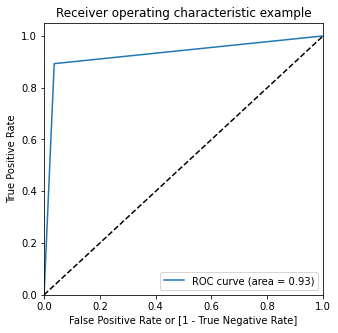

In [ ]:
draw_roc(y_train, y_train_pred)

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_pred,drop_intermediate = False )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9283127920453076
1


In [ ]:
print('Test auc =', metrics.roc_auc_score(y_test, y_test_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred,drop_intermediate = False )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Test auc = 0.9275075430728931
1
